<h2>Different Classiffieres on Random Dataset</h2>

<h4>Read data from file</h4>

In [2]:
import pandas as pd


file_path = './facial_expressions_with_grade_groups_feb_2024.csv'
facial_expressions_data = df = pd.read_csv(file_path, low_memory=False)

<h3>Create train and validations datasets with random samples</h3>

In [3]:
from datetime import datetime
from sklearn.model_selection import train_test_split
import pandas as pd

selected_features = ['Jaw Drop', 'Lip Corner Depressor', 'Lip Suck','Lip Stretch', 'Nose Wrinkle', 'Yaw']

dataset = facial_expressions_data[selected_features + ['Respondent'] + ['Grade Group']]

# Identify the unique respondent IDs
respondent_ids = dataset['Respondent'].unique()

# Set the number of samples to select for each participant in the training set
num_samples_per_participant_train = 10000

# Set the number of participants for validation
num_participants_validation = 5

# Randomly select 11 participants for training
train_participants, validation_participants = train_test_split(respondent_ids, 
                                                               test_size=num_participants_validation, 
                                                               random_state=42)

# Create an empty DataFrame to store the selected training samples
selected_training_samples = pd.DataFrame(columns=dataset.columns)

# Randomly select samples for each participant in the training set
for participant_id in train_participants:
    participant_data = dataset[dataset['Respondent'] == participant_id]
    selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train, 
                                                                                         random_state=42))

# Create training set using the selected training samples
train_set = selected_training_samples

# Create validation set using all rows for the randomly selected 5 participants
validation_set = dataset[dataset['Respondent'].isin(validation_participants)]

# Save the datasets with UTC timestamp
timestamp = datetime.utcnow().strftime("%Y%m%d_%H%M%S")
train_set.to_csv(f"./datasets/random/train_set_{timestamp}.csv", index=False)
validation_set.to_csv(f"./datasets/random/validation_set_{timestamp}.csv", index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_70552\2360506901.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train,
C:\Users\user\AppData\Local\Temp\ipykernel_70552\2360506901.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train,
C:\Users\user\AppData\Local\Temp\ipykernel_70552\2360506901.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data.sample(n=num_samples_per_participant_train,
C:\Users\user\AppData\Local\

<h4>Random Forest</h4>

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Read the datasets before training the classifier
train_set = pd.read_csv(f"./datasets/random/train_set_{timestamp}.csv")
validation_set = pd.read_csv(f"./datasets/random/validation_set_{timestamp}.csv")

# X_train = train_set.drop('Respondent', axis=1)
X_train = train_set.drop(['Respondent', 'Grade Group'], axis=1)
y_train = train_set['Grade Group']

X_validation = validation_set.drop(['Grade Group', 'Respondent'], axis=1)
y_validation = validation_set['Grade Group']

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
predictions = rf_classifier.predict(X_validation)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_validation, predictions)
print(f"Accuracy on the validation set: {accuracy}")
print("Accuracy:", accuracy_score(y_validation, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_validation, predictions))
print("Classification Report:\n", classification_report(y_validation, predictions))

Accuracy on the validation set: 0.44844833840843384
Accuracy: 0.44844833840843384
Confusion Matrix:
 [[ 71901  22009]
 [128510  50481]]
Classification Report:
               precision    recall  f1-score   support

    Above 55       0.36      0.77      0.49     93910
    Below 55       0.70      0.28      0.40    178991

    accuracy                           0.45    272901
   macro avg       0.53      0.52      0.45    272901
weighted avg       0.58      0.45      0.43    272901



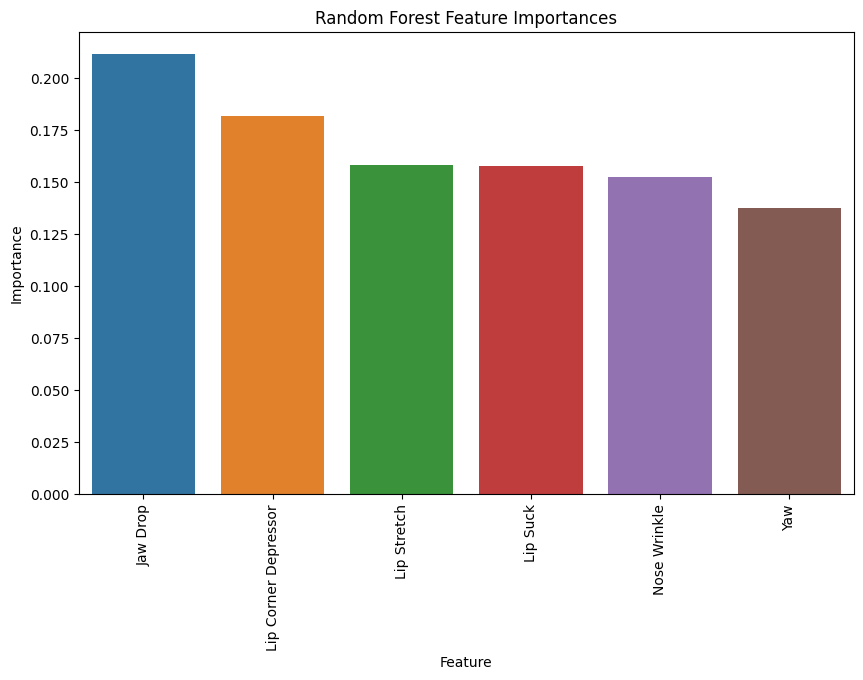

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the feature importances
importances = rf_classifier.feature_importances_
features = X_train.columns

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, features), reverse=True)

# Extract the sorted feature importances and feature names
sorted_feature_importances = [x[0] for x in sorted_importances]
sorted_feature_names = [x[1] for x in sorted_importances]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_names, y=sorted_feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()